In [1]:
from google.colab import files
uploaded = files.upload()

Saving sp500_data.db to sp500_data (3).db


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
conn = sqlite3.connect('sp500_data.db')

# Check the tables in the .db file
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                name
0       constituents
1      price_history
2    sqlite_sequence
3  price_target_news


In [4]:
table_names = ['constituents', 'price_history', 'sqlite_sequence', 'price_target_news']

for table in table_names:
    print(f"\n table：{table}")
    df = pd.read_sql(f"SELECT * FROM {table} LIMIT 10;", conn)
    display(df)


 table：constituents


,symbol,name,sector,sub_sector,head_quarter,date_first_added,cik,founded
0,DASH,DoorDash,Communication Services,Internet Content & Information,"San Francisco, CA",2025-03-24,0001792789,2013
1,EXE,Expand Energy,Energy,Oil & Gas Exploration & Production,"Oklahoma City, OK",2025-03-24,0000895126,1989
2,TKO,TKO Group Holdings,Communication Services,Entertainment,"New York, NY",2025-03-24,0001973266,2023
3,WSM,Williams-Sonoma,Consumer Cyclical,Specialty Retail,"San Francisco, CA",2025-03-24,0000719955,1956
4,APO,Apollo Global Management,Financial Services,Asset Management - Global,"New York City, New York",2024-12-23,0001858681,1990
5,LII,Lennox International,Industrials,Construction,"Richardson, Texas",2024-12-23,0001069202,1895
6,WDAY,"Workday, Inc.",Technology,Software - Application,"Pleasanton, California",2024-12-23,0001327811,2005
7,TPL,Texas Pacific Land Corporation,Energy,Oil & Gas Exploration & Production,"Dallas, Texas",2024-11-26,0001811074,1888
8,DELL,Dell Technologies,Technology,Computer Hardware,"Round Rock, Texas",2024-09-23,0001571996,2016
9,ERIE,Erie Indemnity,Financial Services,Insurance - Brokers,"Erie, Pennsylvania",2024-09-23,0000922621,1925



 table：price_history


,id,symbol,date,open,high,low,close,adj_close,volume
0,1,DASH,2025-05-12,191.86,192.8299,185.9001,189.82,189.82,1729212
1,2,DASH,2025-05-09,183.19,185.5900,180.5800,183.52,183.52,3421951
2,3,DASH,2025-05-08,180.46,183.7500,178.3600,182.96,182.96,4158800
3,4,DASH,2025-05-07,189.76,190.0900,175.5000,176.99,176.99,8627906
4,5,DASH,2025-05-06,193.75,195.4200,185.2500,190.11,190.11,9580800
5,6,DASH,2025-05-05,203.22,207.2300,201.0500,205.40,205.40,5617500
6,7,DASH,2025-05-02,200.07,205.8900,199.4300,205.09,205.09,4488220
7,8,DASH,2025-05-01,194.41,197.7500,192.6600,196.20,196.20,4151610
8,9,DASH,2025-04-30,186.19,193.3000,183.7600,192.89,192.89,3169900
9,10,DASH,2025-04-29,186.15,191.8500,185.8500,191.23,191.23,2853500



 table：sqlite_sequence


,name,seq
0,price_history,626565
1,price_target_news,20654



 table：price_target_news


,id,symbol,published_date,news_url,news_title,analyst_name,price_target,adj_price_target,price_when_posted,news_publisher,news_base_url,analyst_company
0,1,A,2025-04-21T13:30:36.000Z,https://thefly.com/permalinks/entry.php/id4109...,Agilent price target lowered to $116 from $135...,,116.0,116.0,100.26,TheFly,thefly.com,Jefferies
1,2,A,2024-10-15T06:36:00.000Z,https://thefly.com/permalinks/entry.php/id3998...,Agilent price target raised to $145 from $135 ...,Luke Sergott,145.0,145.0,144.25,TheFly,thefly.com,Barclays
2,3,A,2024-10-14T05:35:00.000Z,https://www.streetinsider.com/Analyst+Comments...,Citi Reiterates Buy Rating on Agilent (A),Patrick Donnelly,165.0,165.0,143.82,StreetInsider,streetinsider.com,Citigroup
3,4,A,2024-10-01T08:34:00.000Z,https://thefly.com/permalinks/entry.php/id3991...,Agilent price target raised to $145 from $135 ...,Vijay Kumar,145.0,145.0,148.48,TheFly,thefly.com,Evercore ISI
4,5,A,2024-08-22T06:49:00.000Z,https://thefly.com/permalinks/entry.php/id3972...,Agilent price target raised to $147 from $140 ...,Michael Ryskin,147.0,147.0,139.99,TheFly,thefly.com,Bank of America Securities
5,6,A,2024-07-22T12:42:00.000Z,https://www.streetinsider.com/Analyst+Comments...,Jefferies Reiterates Hold Rating on Agilent (A),Brandon Couillard,135.0,135.0,133.42,StreetInsider,streetinsider.com,Jefferies
6,7,A,2024-05-30T07:23:00.000Z,https://www.streetinsider.com/Analyst+Comments...,Agilent (A) PT Lowered to $151 at Stifel,Daniel Arias,151.0,151.0,133.57,StreetInsider,streetinsider.com,Stifel Nicolaus
7,8,A,2024-05-30T06:16:00.000Z,https://www.streetinsider.com/Analyst+Comments...,Agilent (A) PT Lowered to $136 at Baird,Catherine Schulte,136.0,136.0,145.48,StreetInsider,streetinsider.com,Robert W. Baird
8,9,A,2024-05-30T05:31:00.000Z,https://www.streetinsider.com/Analyst+Comments...,Goldman Sachs Reiterates Buy Rating on Agilent...,Matthew Sykes,145.0,145.0,145.48,StreetInsider,streetinsider.com,Goldman Sachs
9,10,A,2024-04-04T20:55:00.000Z,https://www.streetinsider.com/Upgrades/Stifel+...,Stifel Upgrades Agilent (A) to Buy; 'Preferred...,Daniel Arias,163.0,163.0,141.34,StreetInsider,streetinsider.com,Stifel Nicolaus


# Task 1: Mini-Factor Discovery

## 1. Factor Classification and Strategy

| Factor           | Factor Type       | Strategy Direction | Clarification                         |
|--------------------|------------|--------------|--------------------------------------|
| reversal_5d        | Short-term Reversal   | Long bottom quintile     | A low value indicates that the stock has declined significantly over the past 5 days, suggesting a potential rebound in the following week.        |
| momentum_21d       | Medium-term Momentum   | Long top quintile    | A high value indicates that the stock has exhibited an upward trend over the past month, suggesting that the trend may continue into the following week.          |
| momentum_63d       | Long-term Momentum   | Long top quintile    | Same as above, the stock has upward trend over the past three months, which may continue.                        |
| overnight_gap      | Market sentiment  | Long bottom quintile    | Market sentiment may revert after the weekend; we go long on stocks with large negative gaps.                      |
| overnight_gap     | Market sentiment   | Long top quintile      | Positive news often leads to upward price momentum in the following period.    |
| RSI                | Reversal signal   | Long bottom quintile     | A low RSI indicates the stock is oversold. We adopt a reversal strategy by going long on these potentially undervalued stocks.  |
| MFI                | Liquidity | Long bottom quintile      | An low value means that the stock is oversold. We adopt a reversal strategy by going long on these potentially undervalued stocks.      |
| rolling_std        | volatility     | Long bottom quintile     | A low rolling standard deviation indicates the stock is relatively stable. We go long on these stocks, expecting them to bring stable returns and lower portfolio risk.|
| volume_spike       | Market sentiment| Long bottom quintile     | A high trading volume may result from overreaction. We expect market sentiment to revert to normal, so we adopt a reversal strategy by going long on the bottom quintile stocks.   |
| volume_spike       | Market sentiment| Long bottom quintile     | A surge in trading volume indicates increased market attention, which may signal a positive trend. We go long on the top quintile stocks to capture potential upward momentum.     |

In [5]:
df = pd.read_sql("SELECT * FROM price_history;", conn)
df['date'] = pd.to_datetime(df['date'])

### 1. 5-day Reversal Factor
The 5-day reversal factor measures the short-term mean reversion tendency of a stock’s price. It is calculated as:

$$
\text{5-Day Reversal}_t = \frac{\text{Close}_t}{\text{Close}_{t-5}} - 1
$$

In [6]:
# 5-day Reversal Factor
def compute_reversal_5d(df):
    df = df.sort_values(['symbol', 'date'])
    df['close_5d_ago'] = df.groupby('symbol')['close'].shift(5)
    df['reversal_5d'] = df['close'] / df['close_5d_ago'] - 1
    df['weekday'] = df['date'].dt.weekday
    df_weekly = df[df['weekday'] == 4].copy()

    return df_weekly[['symbol', 'date', 'close', 'reversal_5d']].dropna(subset=['reversal_5d'])

reversal_df = compute_reversal_5d(df)
reversal_df

,symbol,date,close,reversal_5d
401733,A,2020-05-22,84.98,0.041549
401729,A,2020-05-29,88.14,0.091517
401724,A,2020-06-05,90.38,0.025414
401719,A,2020-06-12,86.11,-0.047245
401714,A,2020-06-19,88.73,0.030426
...,...,...,...,...
232206,ZTS,2025-04-04,151.73,-0.069769
232201,ZTS,2025-04-11,149.44,-0.015093
232192,ZTS,2025-04-25,153.47,0.032286
232187,ZTS,2025-05-02,157.44,0.025868


### 2. Momentum Factor
The momentum factor measures the tendency of a stock’s price to continue moving in the same direction over a given period.

$$
\text{Momentum}_t^{(w)} = \frac{\text{Close}_t}{\text{Close}_{t-w}} - 1
$$

In this analysis, we use both one-month (21 trading days) and three-month (63 trading days) momentum factors.

In [7]:
# 1 or 3-month Momentum Factor
def compute_momentum_factors(df, window_list=[21, 63]):
    df = df.sort_values(['symbol', 'date'])
    # Keep the observation of every Friday (weekday == 4)
    df['weekday'] = df['date'].dt.weekday
    df = df[df['weekday'] == 4]

    momentum_dict = {}

    for window in window_list:
        col_name = f"momentum_{window}d"
        df_temp = df.copy()
        df_temp[f'adj_close_{window}d_ago'] = df_temp.groupby('symbol')['adj_close'].shift(window)
        df_temp[col_name] = df_temp['adj_close'] / df_temp[f'adj_close_{window}d_ago'] - 1
        df_temp = df_temp[['date', 'symbol', 'adj_close', col_name]].dropna().reset_index(drop=True)
        df_temp = df_temp.rename(columns={col_name: f'momentum_{window}d'})
        momentum_dict[window] = df_temp


    return momentum_dict

momentum_df = compute_momentum_factors(df)

momentum_21d_df = momentum_df[21]
momentum_63d_df = momentum_df[63]

momentum_63d_df

,date,symbol,adj_close,momentum_63d
0,2021-08-27,A,169.45,1.148200
1,2021-09-03,A,174.78,1.127313
2,2021-09-10,A,172.79,1.027814
3,2021-09-17,A,169.58,0.940719
4,2021-09-24,A,168.08,1.018979
...,...,...,...,...
94042,2025-04-04,ZTS,151.22,-0.227405
94043,2025-04-11,ZTS,148.94,-0.198256
94044,2025-04-25,ZTS,153.47,-0.187387
94045,2025-05-02,ZTS,157.44,-0.155455


### 3. Overnight Gap (Weekly)

The Overnight Gap on each Friday is calculated as:

$$
\text{OvernightGap}_t = \frac{\text{Open}_t - \text{Close}_{t-1}}{\text{Close}_{t-1}}
$$

Where:

- Open_t: Opening price on **Friday**
- Close_{t-1}: Closing price on **Thursday**

This measures the overnight return from Thursday close to Friday open.

In [8]:
# Overnight Gap
def compute_overnight_gap(df):

    df = df.sort_values(['symbol', 'date']).copy()

    df['close_prev'] = df.groupby('symbol')['close'].shift(1)

    df['overnight_gap'] = (df['open'] - df['close_prev']) / df['close_prev']

    # Keep the observation of every Friday (weekday == 4)
    df['weekday'] = df['date'].dt.weekday
    df = df[df['weekday'] == 4].copy()

    df = df[['date', 'symbol', 'overnight_gap']].dropna().reset_index(drop=True)
    df = df.rename(columns={'overnight_gap': 'factor'}).reset_index(drop=True)
    return df

overnight_gap_df = compute_overnight_gap(df)
overnight_gap_df

,date,symbol,factor
0,2020-05-15,A,-0.001592
1,2020-05-22,A,0.052632
2,2020-05-29,A,0.005537
3,2020-06-05,A,0.010862
4,2020-06-12,A,0.021169
...,...,...,...
125719,2025-04-04,ZTS,-0.022618
125720,2025-04-11,ZTS,-0.002449
125721,2025-04-25,ZTS,-0.001641
125722,2025-05-02,ZTS,0.018246


### 4. Relative Strength Index (RSI)

The RSI is calculated as:

$$
RSI = 100 - \frac{100}{1 + RS}
$$

Where:

$$
RS = \frac{\text{Average Gain over N periods}}{\text{Average Loss over N periods}}
$$

I chose the calculation window N = 14 here.

---

- RSI ranges between 0 and 100.  
- RSI > 70 typically indicates **overbought** conditions.  
- RSI < 30 typically indicates **oversold** conditions.

In [9]:
# Relative Strength Index
def compute_rsi(df, window=14):

    df = df.sort_values(['symbol', 'date']).copy()

    # Calculate daily price change per symbol
    df['price_change'] = df.groupby('symbol')['close'].diff()

    # Separate gains (upward price moves) and losses (downward moves)
    df['gain'] = df['price_change'].clip(lower=0)
    df['loss'] = -df['price_change'].clip(upper=0)

    # Calculate rolling average gain and loss over the specified window
    df['avg_gain'] = df.groupby('symbol')['gain'].transform(lambda x: x.rolling(window).mean())
    df['avg_loss'] = df.groupby('symbol')['loss'].transform(lambda x: x.rolling(window).mean())

    # RSI's formula
    df['rs'] = df['avg_gain'] / df['avg_loss']
    df['rsi'] = 100 - (100 / (1 + df['rs']))

    df['weekday'] = df['date'].dt.weekday
    df = df[df['weekday'] == 4]

    df = df[['date', 'symbol', 'rsi']].dropna().reset_index(drop=True)
    df = df.rename(columns={'rsi': 'factor'}).reset_index(drop=True)
    return df

RSI_df = compute_rsi(df)
RSI_df.head()

,date,symbol,factor
0,2020-06-05,A,77.247365
1,2020-06-12,A,54.206999
2,2020-06-19,A,44.694245
3,2020-06-26,A,35.138795
4,2020-07-10,A,53.144941


### 5. Money Flow Index (MFI)

The MFI combines price and volume to measure buying and selling pressure. It is calculated as:

$$
\text{TP}_t = \frac{\text{High}_t + \text{Low}_t + \text{Close}_t}{3}, \quad
\text{RawMF}_t = \text{TP}_t \times \text{Volume}_t
$$

Money flow is classified as:

$$
\text{PositiveMF}_t = \begin{cases}
\text{RawMF}_t, & \text{if } TP_t > TP_{t-1} \\
0, & \text{otherwise}
\end{cases}
,\quad
\text{NegativeMF}_t = \begin{cases}
\text{RawMF}_t, & \text{if } TP_t < TP_{t-1} \\
0, & \text{otherwise}
\end{cases}
$$

Define the Money Flow Ratio over \( N \) periods as:

$$
\text{MFR} = \frac{\sum \text{PositiveMF}}{\sum \text{NegativeMF}}
$$

Then the Money Flow Index is:

$$
\text{MFI} = 100 - \frac{100}{1 + \text{MFR}}
$$

I chose the calculation window N=14.

In [10]:
# Money Flow Indicator
def compute_mfi(df, window=14):

    df = df.sort_values(['symbol', 'date']).copy()

    # Step 1: Typical Price
    df['typical_price'] = (df['high'] + df['low'] + df['close']) / 3

    # Step 2: Raw Money Flow = Typical Price × Volume
    df['raw_mf'] = df['typical_price'] * df['volume']

    # Step 3: Determine direction (positive / negative money flow)
    df['tp_diff'] = df.groupby('symbol')['typical_price'].diff()
    df['positive_mf'] = np.where(df['tp_diff'] > 0, df['raw_mf'], 0)
    df['negative_mf'] = np.where(df['tp_diff'] < 0, df['raw_mf'], 0)

    # Step 4: Rolling sums
    df['pos_mf_sum'] = df.groupby('symbol')['positive_mf'].transform(lambda x: x.rolling(window).sum())
    df['neg_mf_sum'] = df.groupby('symbol')['negative_mf'].transform(lambda x: x.rolling(window).sum())

    # Step 5: Compute MFI
    df['money_flow_ratio'] = df['pos_mf_sum'] / df['neg_mf_sum']
    df['mfi'] = 100 - (100 / (1 + df['money_flow_ratio']))

    # Step 6: Filter for weekly (Friday) observations
    df['weekday'] = df['date'].dt.weekday
    df = df[df['weekday'] == 4]

    # Clean output
    df = df[['date', 'symbol', 'mfi']].dropna()
    df = df.rename(columns={'mfi': 'factor'}).reset_index(drop=True)

    return df

mfi_df = compute_mfi(df)
mfi_df

,date,symbol,factor
0,2020-06-05,A,74.167058
1,2020-06-12,A,67.521344
2,2020-06-19,A,62.353745
3,2020-06-26,A,36.308137
4,2020-07-10,A,42.832089
...,...,...,...
124214,2025-04-04,ZTS,23.334629
124215,2025-04-11,ZTS,28.196949
124216,2025-04-25,ZTS,53.429821
124217,2025-05-02,ZTS,68.528111


### 6. Rolling Standard Deviation
The 5-day standard deviation of closing prices serves as a measure of recent price volatility.

$$
\text{Rolling Std}_t = \sqrt{\frac{1}{5} \sum_{i=1}^{5} \left(\text{Close}_{t-i+1} - \bar{C}_t \right)^2}
$$

where

$$
\bar{C}_t = \frac{1}{5} \sum_{i=1}^{5} \text{Close}_{t-i+1}
$$

In [11]:
def compute_rolling_std(df, window=5):

    df = df.sort_values(['symbol', 'date']).copy()
    df['rolling_std'] = df.groupby('symbol')['close'].transform(lambda x: x.rolling(window).std())
    df['weekday'] = df['date'].dt.weekday
    df = df[df['weekday'] == 4]
    df = df[['date', 'symbol', 'rolling_std']].dropna()
    df = df.rename(columns={'rolling_std': 'factor'}).reset_index(drop=True)
    return df

rolling_std_df = compute_rolling_std(df)
rolling_std_df

,date,symbol,factor
0,2020-05-22,A,1.688085
1,2020-05-29,A,1.145264
2,2020-06-05,A,0.447068
3,2020-06-12,A,2.441418
4,2020-06-19,A,0.683572
...,...,...,...
125218,2025-04-04,ZTS,5.139883
125219,2025-04-11,ZTS,3.373581
125220,2025-04-25,ZTS,2.529996
125221,2025-05-02,ZTS,1.425647


### 7. Volume Spike
A volume spike measures how much a stock’s trading volume exceeds its typical recent level.

$$
\text{Volume Spike}_t = \frac{\text{Volume}_t}{\text{Rolling Mean Volume}_{t-w:t-1}}
$$

where $w$ is the chosen window size to calculate the mean (I use 20 days).


In [12]:
# Volume spike:
def compute_volume_spike(df, window=20):
    """
    Compute the Volume Spike factor, defined as the ratio of current volume to the average volume over the past 'window' days (e.g. 20).
    Samples only Fridays. Returns a DataFrame with [date, symbol, factor].
    """
    df = df.sort_values(['symbol', 'date']).copy()
    df['avg_volume'] = df.groupby('symbol')['volume'].transform(lambda x: x.rolling(window).mean())
    df['volume_spike'] = df['volume'] / df['avg_volume']
    df['weekday'] = df['date'].dt.weekday
    df = df[df['weekday'] == 4]
    df = df[['date', 'symbol', 'volume_spike']].dropna()
    df = df.rename(columns={'volume_spike': 'factor'}).reset_index(drop=True)
    return df

volume_spike_df = compute_volume_spike(df)
volume_spike_df

,date,symbol,factor
0,2020-06-12,A,0.631347
1,2020-06-19,A,0.872752
2,2020-06-26,A,1.300500
3,2020-07-10,A,0.671293
4,2020-07-17,A,2.232364
...,...,...,...
123713,2025-04-04,ZTS,1.490951
123714,2025-04-11,ZTS,1.079526
123715,2025-04-25,ZTS,1.157384
123716,2025-05-02,ZTS,0.885517


## 2. Construct weekly cross-sectional quintile portfolios

Weekly performance is measured from Monday open to Friday close. Since the equity factor is derived from the Friday close price, using that same price in return calculation would introduce look-ahead bias.

In [13]:
def compute_forward_returns(df):
    df['entry_date'] = df['date'] + pd.Timedelta(days=3)
    df['exit_date'] = df['date'] + pd.Timedelta(days=7)

    df_mon = df[df['date'].dt.weekday == 0][['symbol', 'date', 'open']]
    df_fri = df[df['date'].dt.weekday == 4][['symbol', 'date', 'close']]

    df = df.merge(df_mon.rename(columns={'date': 'entry_date', 'open': 'entry_price'}), on=['symbol', 'entry_date'], how='left')
    df = df.merge(df_fri.rename(columns={'date': 'exit_date', 'close': 'exit_price'}), on=['symbol', 'exit_date'], how='left')
    df['fwd_return'] = df['exit_price'] / df['entry_price'] - 1

    return df.dropna(subset=['fwd_return'])

fwd_return_df = compute_forward_returns(df)
fwd_return_df

,id,symbol,date,open,high,low,close,adj_close,volume,entry_date,exit_date,entry_price,exit_price,fwd_return
6,7,DASH,2025-05-02,200.07,205.89,199.43,205.09,205.09,4488220,2025-05-05,2025-05-09,203.22,183.52,-0.096939
11,12,DASH,2025-04-25,187.22,191.10,183.20,187.76,187.76,4515222,2025-04-28,2025-05-02,188.81,205.09,0.086224
25,26,DASH,2025-04-04,165.65,170.23,162.56,163.16,163.16,6515506,2025-04-07,2025-04-11,156.13,180.49,0.156024
30,31,DASH,2025-03-28,193.80,193.80,182.07,182.61,182.61,4557200,2025-03-31,2025-04-04,178.01,163.16,-0.083422
35,36,DASH,2025-03-21,190.72,194.40,187.20,190.62,190.62,73637400,2025-03-24,2025-03-28,192.81,182.61,-0.052902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626538,626539,XOM,2020-06-19,48.22,48.26,45.98,45.98,36.97,48899935,2020-06-22,2020-06-26,45.69,43.62,-0.045305
626543,626544,XOM,2020-06-12,48.04,48.62,45.91,47.17,37.93,30978124,2020-06-15,2020-06-19,45.35,45.98,0.013892
626548,626549,XOM,2020-06-05,51.65,53.45,51.60,53.08,42.68,41328943,2020-06-08,2020-06-12,54.72,47.17,-0.137975
626553,626554,XOM,2020-05-29,44.82,45.69,44.37,45.47,36.56,25886238,2020-06-01,2020-06-05,45.32,53.08,0.171227


In [14]:
def run_cross_sectional_backtest(factor_df, reversal):
    """
    Run cross-sectional long-short backtest on weekly factor data.

    Parameters:
        factor_df (pd.DataFrame): Must include ['date', 'symbol', 'factor', 'fwd_return']
        reversal (bool): If True, use reversal logic (long bottom quintile); if False, momentum logic (long top quintile)

    Returns:
        pd.DataFrame: Weekly backtest result with long, short, and long-short returns.
    """
    results = []

    for date, group in factor_df.groupby('date'):
        group = group.dropna(subset=['factor', 'fwd_return'])

        if len(group) < 10 or group['factor'].nunique() < 5:
            continue

        try:
            group['quintile'] = pd.qcut(group['factor'], 5, labels=False, duplicates='drop')
        except ValueError:
            continue

        if reversal:
            long = group[group['quintile'] == 0]
            short = group[group['quintile'] == 4]
        else:
            long = group[group['quintile'] == 4]
            short = group[group['quintile'] == 0]

        long_ret = long['fwd_return'].mean()
        short_ret = short['fwd_return'].mean()
        total_ret = long_ret - short_ret

        results.append({
            'date': date,
            'long_return': long_ret,
            'short_return': short_ret,
            'total_return': total_ret
        })

    return pd.DataFrame(results)

In [15]:
# Assume that our goal is to get positive return, so the target return rate is 0
def summarize_backtest(results_df, factor_name, strategy_name):
    mean_ret = results_df['total_return'].mean()
    t_stat = results_df['total_return'].mean() / (results_df['total_return'].std() / len(results_df))
    ir = results_df['total_return'].mean() / results_df['total_return'].std()

    return {
        'factor': factor_name,
        'strategy': strategy_name,
        'mean_return': mean_ret,
        't_stat': t_stat,
        'IR': ir
    }

In [16]:
factors = {
    'reversal_5d': reversal_df,
    'momentum_21d': momentum_21d_df,
    'momentum_63d': momentum_63d_df,
    'overnight_gap': overnight_gap_df,
    'rsi': RSI_df,
    'mfi': mfi_df,
    'rolling_std': rolling_std_df,
    'volume_spike': volume_spike_df,
    }
#     'intraweek_vol': intraweek_vol_df,

In [17]:
all_results = []

for name, df in factors.items():
    print(f"Running: {name}")

    factor_df = df.copy()
    factor_df = factor_df.rename(columns={factor_df.columns[-1]: 'factor'})
    factor_df = factor_df.merge(fwd_return_df, on=['symbol', 'date'], how='left')

    # Reversal backtest
    rev_df = run_cross_sectional_backtest(factor_df, reversal=True)
    all_results.append(summarize_backtest(rev_df, name, 'reversal'))

    # Momentum backtest
    mom_df = run_cross_sectional_backtest(factor_df, reversal=False)
    all_results.append(summarize_backtest(mom_df, name, 'momentum'))

summary_df = pd.DataFrame(all_results).sort_values(by='IR', ascending=False)

Running: reversal_5d
Running: momentum_21d
Running: momentum_63d
Running: overnight_gap
Running: rsi
Running: mfi
Running: rolling_std
Running: volume_spike


In [18]:
print(summary_df)

           factor  strategy  mean_return     t_stat        IR
10            mfi  reversal     0.000967  13.777702  0.064684
6   overnight_gap  reversal     0.001415  12.407919  0.057711
0     reversal_5d  reversal     0.001179  11.969291  0.055931
15   volume_spike  momentum     0.000497  11.412254  0.053831
8             rsi  reversal     0.000648   8.225622  0.038618
5    momentum_63d  momentum     0.000943   6.159449  0.038257
2    momentum_21d  reversal     0.000837   7.411928  0.037624
12    rolling_std  reversal     0.000099   1.261239  0.005894
13    rolling_std  momentum    -0.000099  -1.261239 -0.005894
3    momentum_21d  momentum    -0.000837  -7.411928 -0.037624
4    momentum_63d  reversal    -0.000943  -6.159449 -0.038257
9             rsi  momentum    -0.000648  -8.225622 -0.038618
14   volume_spike  reversal    -0.000497 -11.412254 -0.053831
1     reversal_5d  momentum    -0.001179 -11.969291 -0.055931
7   overnight_gap  momentum    -0.001415 -12.407919 -0.057711
11      

Based on the information ratio, I selected the Money Flow Index (MFI) as the single-factor strategy. The information ratio evaluates the excess return achieved per unit of risk. This ensures the selected strategy is robust and risk-efficient.

### Reflection
1. For Task 1, since the analysis is based on a weekly cross-sectional strategy, I considered both reversal and momentum effects as possible drivers of returns. To be comprehensive, I tested both approaches for all factors and treated the choice between reversal and momentum as a hyperparameter in my framework. The factor selection itself was guided by the available OHLCV data, and I constructed indicators using as much information as possible from these fields.

2. What surprised me most was that the reversal strategy generally outperformed the momentum strategy across most factors. Even the momentum_21d factor delivered stronger results when used in a reversal framework, suggesting that the true momentum window might be longer much than I initially expected.

3. If I had additional time, my next steps would focus on two main areas: strategy design and factor mining. Given that the current strategy outcomes are not good, and that many parameters, such as window length, remain to be tuned. There is significant room for further exploration. I would aim to refine and experiment with the strategy logic, and once a robust framework is established, devote more effort to mining new factors. Since factor construction is sensitive to window selection, there are many possibilities yet to be explored.
Currently, liquidity-related factors have shown relatively promising results, so I would prioritize exploring additional liquidity-based signals in future simulations. Sometimes, strategies may underperform not because the underlying signals lack value, but due to design or implementation limitations. Incorporating new performance metrics, such as relative Sharpe ratios, could provide a more nuanced assessment of strategy effectiveness and better highlight their strengths and weaknesses. Therefore, expanding the set of evaluation metrics is also an important step.

# Task 2: Risk-Adjusted Back-tester in 30 Lines

## Analysis Logic:
1. **Factor and Strategy Confirmation**  
Based on the results of Task 1, I selected the Money Flow Index (MFI) as the single factor for constructing a weekly cross-sectional quintile portfolio using a reversal strategy.

2. **Portfolio Formation**  
 An equal-weighted long-short reversal strategy is employed: go long on stocks with the lowest MFI (bottom quintile) and short those with the highest MFI (top quintile).  
   - **Rebalance frequency:** Weekly. MFI values are evaluated each Friday; trades are executed at the following Monday open, and positions are closed at Friday close.
   - **Transaction costs:** Each trade incurs a transaction fee of 50 bps. Since we track returns as rates rather than dollar values, a total transaction cost of 100 bps per position is applied for opening and closing. If a stock is continuously held into the next week, no additional transaction fee is charged, thus avoiding overestimation of turnover costs.


3. **Tracking Position and Turnover**  
Weekly holdings and disposals are recorded, and changes in the portfolio are tracked to serve as the foundation for calculating turnover and transaction costs.

4. **Return Calculation**  
Calculate the forward one-week return for each stock based on Monday’s open and Friday’s close in the following week.
Compute the long-short portfolio return for each week after deducting transaction costs.

5. **Performance Metrics**  
Evaluate the strategy by cumulative return rate, annualized Sharpe ratio, maximum drawdown, and portfolio turnover.

In [19]:
df_2 = mfi_df.merge(fwd_return_df, on=['symbol', 'date'], how='left')
result_df = run_cross_sectional_backtest(df_2, reversal=True)

In [20]:
results, prev_long_set, prev_short_set = [], set(), set()

for date, group in df_2.groupby('date'):
    group = group.dropna(subset=['factor', 'fwd_return'])
    if group['factor'].nunique() < 5 or len(group) < 10: continue
    try:
        group['quintile'] = pd.qcut(group['factor'], 5, labels=False, duplicates='drop')
    except ValueError: continue

    long_symbols = set(group[group['quintile'] == 0]['symbol'])
    short_symbols = set(group[group['quintile'] == 4]['symbol'])

    changed_long = long_symbols.symmetric_difference(prev_long_set)
    changed_short = short_symbols.symmetric_difference(prev_short_set)

    turnover = (len(changed_long) + len(changed_short)) / len(group)
    cost = turnover * 0.005 * 2
    long_ret = group[group['quintile'] == 0]['fwd_return'].mean()
    short_ret = group[group['quintile'] == 4]['fwd_return'].mean()
    total_ret = short_ret - long_ret - cost

    results.append({'date': date, 'long_return': long_ret, 'short_return': short_ret, 'total_return': total_ret, 'turnover': turnover})
    prev_long_set, prev_short_set = long_symbols, short_symbols

tracked_df = pd.DataFrame(results)
tracked_df['cumulative_return'] = (1 + tracked_df['total_return']).cumprod()



final_cum_return = tracked_df['cumulative_return'].iloc[-1]
mean_ret, std_ret = tracked_df['total_return'].mean(), tracked_df['total_return'].std()
annualized_sharpe = mean_ret / std_ret * (52 ** 0.5) if std_ret > 0 else float('nan')
cummax = tracked_df['cumulative_return'].cummax()
max_drawdown = (tracked_df['cumulative_return'] / cummax - 1).min()
avg_turnover = tracked_df['turnover'].mean()
print("Final Cumulative Return: {:.2f}x".format(final_cum_return))
print("Annualized Sharpe Ratio: {:.2f}".format(annualized_sharpe))
print("Max Drawdown: {:.2%}".format(max_drawdown))
print("Average Weekly Turnover: {:.2%}".format(avg_turnover))

Final Cumulative Return: 0.34x
Annualized Sharpe Ratio: -2.42
Max Drawdown: -65.11%
Average Weekly Turnover: 40.36%


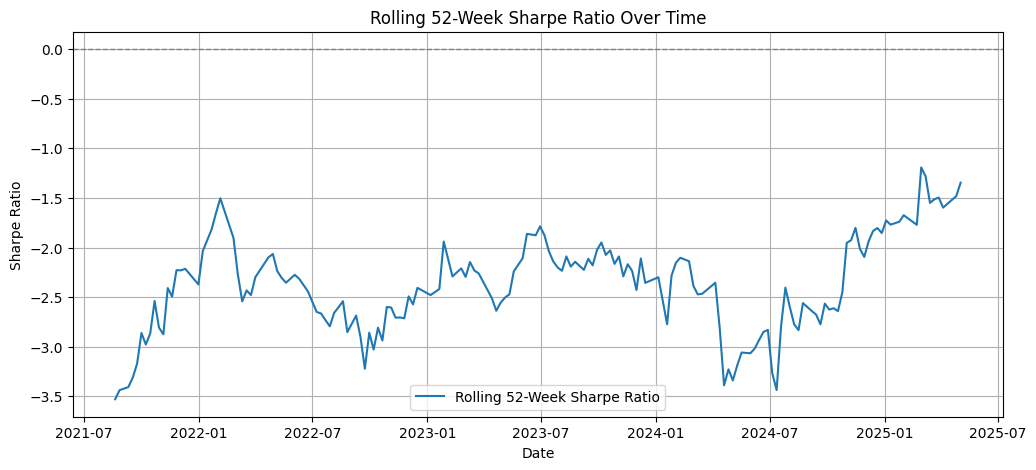

In [21]:
# Compute rolling 52-week Sharpe Ratio
rolling_mean = tracked_df['total_return'].rolling(52).mean()
rolling_std = tracked_df['total_return'].rolling(52).std()
tracked_df['rolling_sharpe'] = (rolling_mean / rolling_std) * np.sqrt(52)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(tracked_df['date'], tracked_df['rolling_sharpe'], label='Rolling 52-Week Sharpe Ratio')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Rolling 52-Week Sharpe Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.show()

After accounting for transaction fees, the already modest weekly return rate turned negative, indicating that the current strategy is not effective in practice. However, from the plot of rolling annualized Sharpe ratios, we observe an upward trend in the Sharpe ratio during the later part of the backtest period. This suggests that the strategy may become more effective under certain market conditions. By analyzing the corresponding price charts or integrating additional market indicators, we may identify specific periods when this strategy is better suited.

### Reflection
1. As stated in **Analysis Logic**
2. Transaction costs had a much greater impact than I initially expected, which reinforces the importance of simulating realistic strategies. Taking actual market conditions into account is essential for developing robust and truly effective trading approaches.
3. I will focus on further improving strategy design and performance metrics. As mentioned previously, it is crucial to ensure that the strategy reflects realistic conditions before expanding into new factor exploration. Beyond transaction costs, additional real-world constraints such as trading limits and varying portfolio weights should be considered to make the backtest more robust. Because standard performance metrics may not be fully meaningful under non-realistic strategies, adopting relative measures can provide a more accurate assessment of the strategy’s value. Moreover, for Sharpe ratio calculation, I would use a contemporaneous risk-free rate—such as the prevailing interest rate or the 10-year US Treasury yield over the same simulation period—to provide a more persuasive and realistic benchmark, even though this might make it harder for the strategy to outperform.

# Task 3: Analyst Price Targets and KPIs

### 1. Analyst Target Accuracy(ATA)
**Definition:**  
ATA measures the prediction accuracy of an analyst's price target. It is defined as the relative difference between the adjusted price target and the actual price. The closer ATA is to zero, the more accurate the forecast.

$$
\text{ATA} = ｜ \frac{\text{Adjusted Price Target} - \text{Actual Price}}{\text{Actual Price}}｜
$$

where $\text{Actual Price}$ is the average of daily prices during the week before and after the analyst’s forecast date.

**Interpretation:**  
Using the relative error between the price target and the actual price standardizes all analyst forecasts to a comparable scale, regardless of the absolute price level of different stocks. The closer the value is to zero, the more accurate the forecast.

This enhances the usability of the data and enables consistent, objective evaluation of analyst performance across the entire dataset.

### 2. Signal Strength (SS)
**Definition:**  
SS measures how strong an analyst's forecast is compared to the current market price. Its formula can be as below.


$$
\text{SS} = \frac{\text{Adjusted Price Target} - \text{Price When Posted}}{\text{Price When Posted}}
$$



**Interpretation:**  
A higher absolute value indicates that the analyst predicts a significant move in the stock price from the current level. A positive value suggests a bullish outlook, while a negative value indicates a bearish stance. Values close to zero imply that the analyst does not expect substantial price movement. This metric provides insight into the analyst’s expectation and can be used to gauge overall market sentiment toward the stock.

### 3. Timeliness of the Target
**Definition:**
The speed and magnitude of the market’s response to the signal in the short term after the publication of the price target.

$$
Timeliness = \frac{Price_{T+5} - {Price\ When\ Posted}}{Price\ When\ Posted}
$$

**Interpretion:**
This indicator measures the price movement of a stock in the market following the analyst’s forecast, and can reflect the influence or impact of the analyst. However, its explanatory power is limited, as many other factors also contribute to stock price fluctuations.

### 4. Forecast Timeliness

**Definition:**
The ratio of the time required for the stock price to reach the target price to the total forecast horizon. The sooner the target is achieved, the better.

$$
\text{Forecast Timeliness} = 1 − \frac{\text{Days to Hit Target}}{\text{Forecast Horizon}}
$$

**Interpretation:**
When this value approaches 1, it indicates that the stock reached the target price very quickly (i.e., the number of days to hit the target is much less than the forecast horizon), suggesting the analyst’s prediction was timely and forward-looking. When Forecast Timeliness approaches 0, it means the stock only reached the target price near the end of the forecast period, or not at all, indicating average or poor timeliness.

### 5. Consistency of An Analyst Performance
**Definition:**
Measures how stable or reliable an analyst’s predictions are across time and multiple stocks.

For a single analyst and single stock:

$$
\text{Consistency} = \frac{1}{\text{Std(Target Accuracy across reports)}}
$$

For multiple stocks:  
Calculate the standard deviation of prediction errors for all forecasts by the analyst.

**Interpresion:**
Low standard deviation indicates high consistency. Reliable analysts show less variance in their accuracy or signal strength. These data are easy to access.

### 6. Forecast Revision Volatility (FRV)

**Definition:**
The frequency and magnitude of target price revisions made by an analyst for the same stock.

$$
FRV = Std(\text{target Price Revisions}) \times Num(Revisions)
$$


**Interpretation:**
Identifies whether an analyst frequently revises their forecasts, which may indicate unstable judgment or a high sensitivity to market conditions.

### 7. Analyst Alpha (AA)

**Definition:**
Measures whether following the analyst’s recommendation generates returns above the market benchmark within a specified period after the forecast is published.

$$
AA = R_{stocks\ recommended} - R_{market}
$$
where $R_{market}$ can use S&P 500 or any chosen benchmark return.


**Interpretation:**
Directly evaluates whether the analyst’s forecast has practical investment value and reflects the analyst’s stock-picking ability.

### 8. Analyst Bias (AB)

**Definition:**
The average directional prediction error (positive: long-term optimistic bias, negative: long-term conservative bias).

$$
AB = avg(\text{adjusted price target} - \text{adjusted future price})
$$

**Interpretation:**
An analyst’s AB score can be used to assess their general market outlook or style preference, such as whether they tend to be consistently optimistic or conservative in their forecasts.

### Reflection
1. By following the steps provided, I learned about different types of KPIs for analysts. Some metrics, like accuracy and reliability, were adapted from well-known metrics in other fields. Others were revised or created on my understanding in response to the available dataset.
2. What surprised me was how much room there is for creativity in KPI design. Even with limited data, it is possible to develop meaningful and robust indicators by adapting ideas from other fields and carefully considering the specifics of the dataset.
3. First, I would use the *price_target_news* table to evaluate the effectiveness and explanatory power of these indicators. Additionally, it is important to consider metrics that are suitable for small sample sizes, as analyst data can be difficult to collect and may be limited. Using indicators designed for small samples could therefore provide more reliable and meaningful insights in this context.